In [1]:
# For inline plotting
%matplotlib inline

# For auto reloading
%load_ext autoreload
%autoreload 2

# Balanced Incomplete Block Design (BIBD) algorithm

[[1 1 0 0]
 [0 0 1 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 0 1]
 [0 1 1 0]]


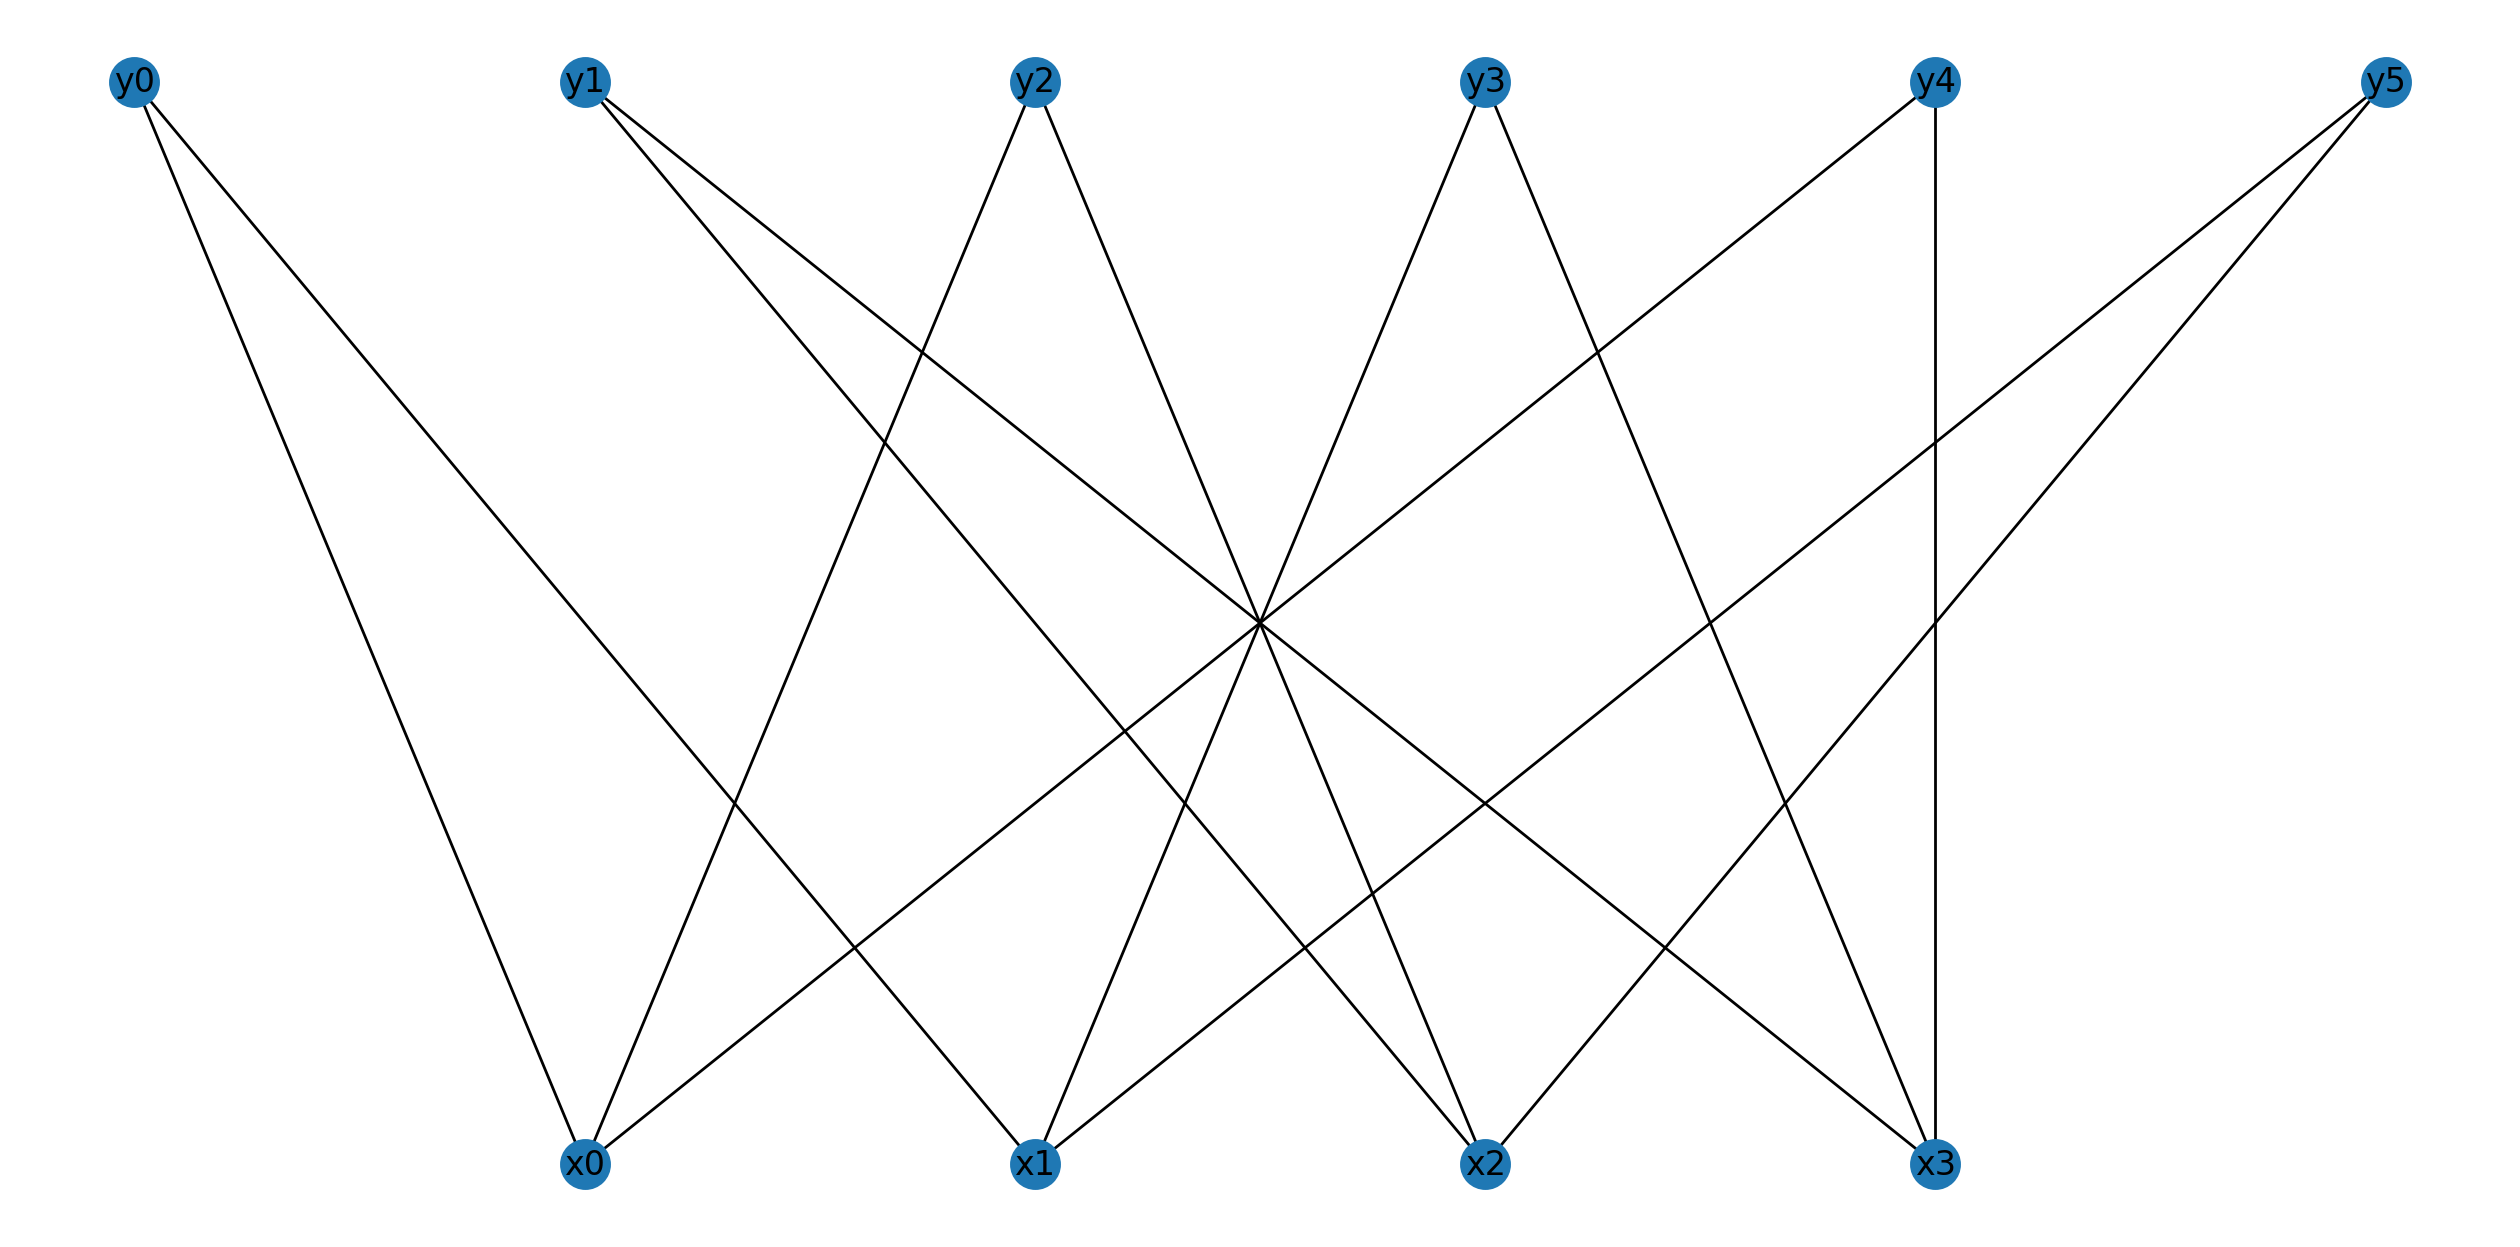

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from bibd.bibd_layer import generate_bibd_mask
from networkx.algorithms import bipartite

q = 2

B = nx.Graph()
B.add_nodes_from(['x{}'.format(j) for j in range(q*q)], bipartite=0)
B.add_nodes_from(['y{}'.format(i) for i in range(q*(q+1))], bipartite=1)
# B.add_nodes_from([j for j in range(q*q)], bipartite=0)
# B.add_nodes_from([i for i in range(q*(q+1))], bipartite=1)

# Here w_ij = 1 iff x_j and y_i are connected
W = generate_bibd_mask(q)
W = W.astype(int)
print(W)
for i in range(q * (q + 1)):
    for j in range(q * q):
        if W[i][j] == 1:
            B.add_edges_from([('x{}'.format(j), 'y{}'.format(i))])
#             B.add_edges_from([(j, i)])

X, Y = bipartite.sets(B)
X = list(X)
Y = list(Y)
X.sort(key=lambda x: int(x[1:]))
Y.sort(key=lambda y: int(y[1:]))
offset = (len(Y) - len(X)) / 2
pos = dict()
# pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
# pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
pos.update( (n, (i + offset, 1)) for i, n in enumerate(X) ) # put nodes from X at y=1
pos.update( (n, (i, 2)) for i, n in enumerate(Y) ) # put nodes from Y at y=2
plt.subplots(figsize=(16,8), dpi=200)
nx.draw(B, pos=pos, with_labels=True)

In [29]:
def plot_bibd(q):
    B = nx.Graph()
    B.add_nodes_from(['x{}'.format(j) for j in range(q*q)], bipartite=0)
    B.add_nodes_from(['y{}'.format(i) for i in range(q*(q+1))], bipartite=1)

    # Here w_ij = 1 iff x_j and y_i are connected
    W = generate_bibd_mask(q)
    W = W.astype(int)
    print(W)
    for i in range(q * (q + 1)):
        for j in range(q * q):
            if W[i][j] == 1:
                B.add_edges_from([('x{}'.format(j), 'y{}'.format(i))])

    X, Y = bipartite.sets(B)
    X = list(X)
    Y = list(Y)
    X.sort(key=lambda x: int(x[1:]))
    Y.sort(key=lambda y: int(y[1:]))
    offset = (len(Y) - len(X)) / 2
    pos = dict()
    # Put nodes from X at y = 1
    pos.update( (n, (i + offset, 1)) for i, n in enumerate(X) )
    # Put nodes from Y at y = 2
    pos.update( (n, (i, 2)) for i, n in enumerate(Y) )
    plt.subplots(figsize=(16,8), dpi=200)
    nx.draw(B, pos=pos, with_labels=True)

[[1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1]
 [1 0 0 1 0 0 1 0 0]
 [0 1 0 0 1 0 0 1 0]
 [0 0 1 0 0 1 0 0 1]
 [1 0 0 0 1 0 0 0 1]
 [0 1 0 0 0 1 1 0 0]
 [0 0 1 1 0 0 0 1 0]
 [1 0 0 0 0 1 0 1 0]
 [0 1 0 1 0 0 0 0 1]
 [0 0 1 0 1 0 1 0 0]]


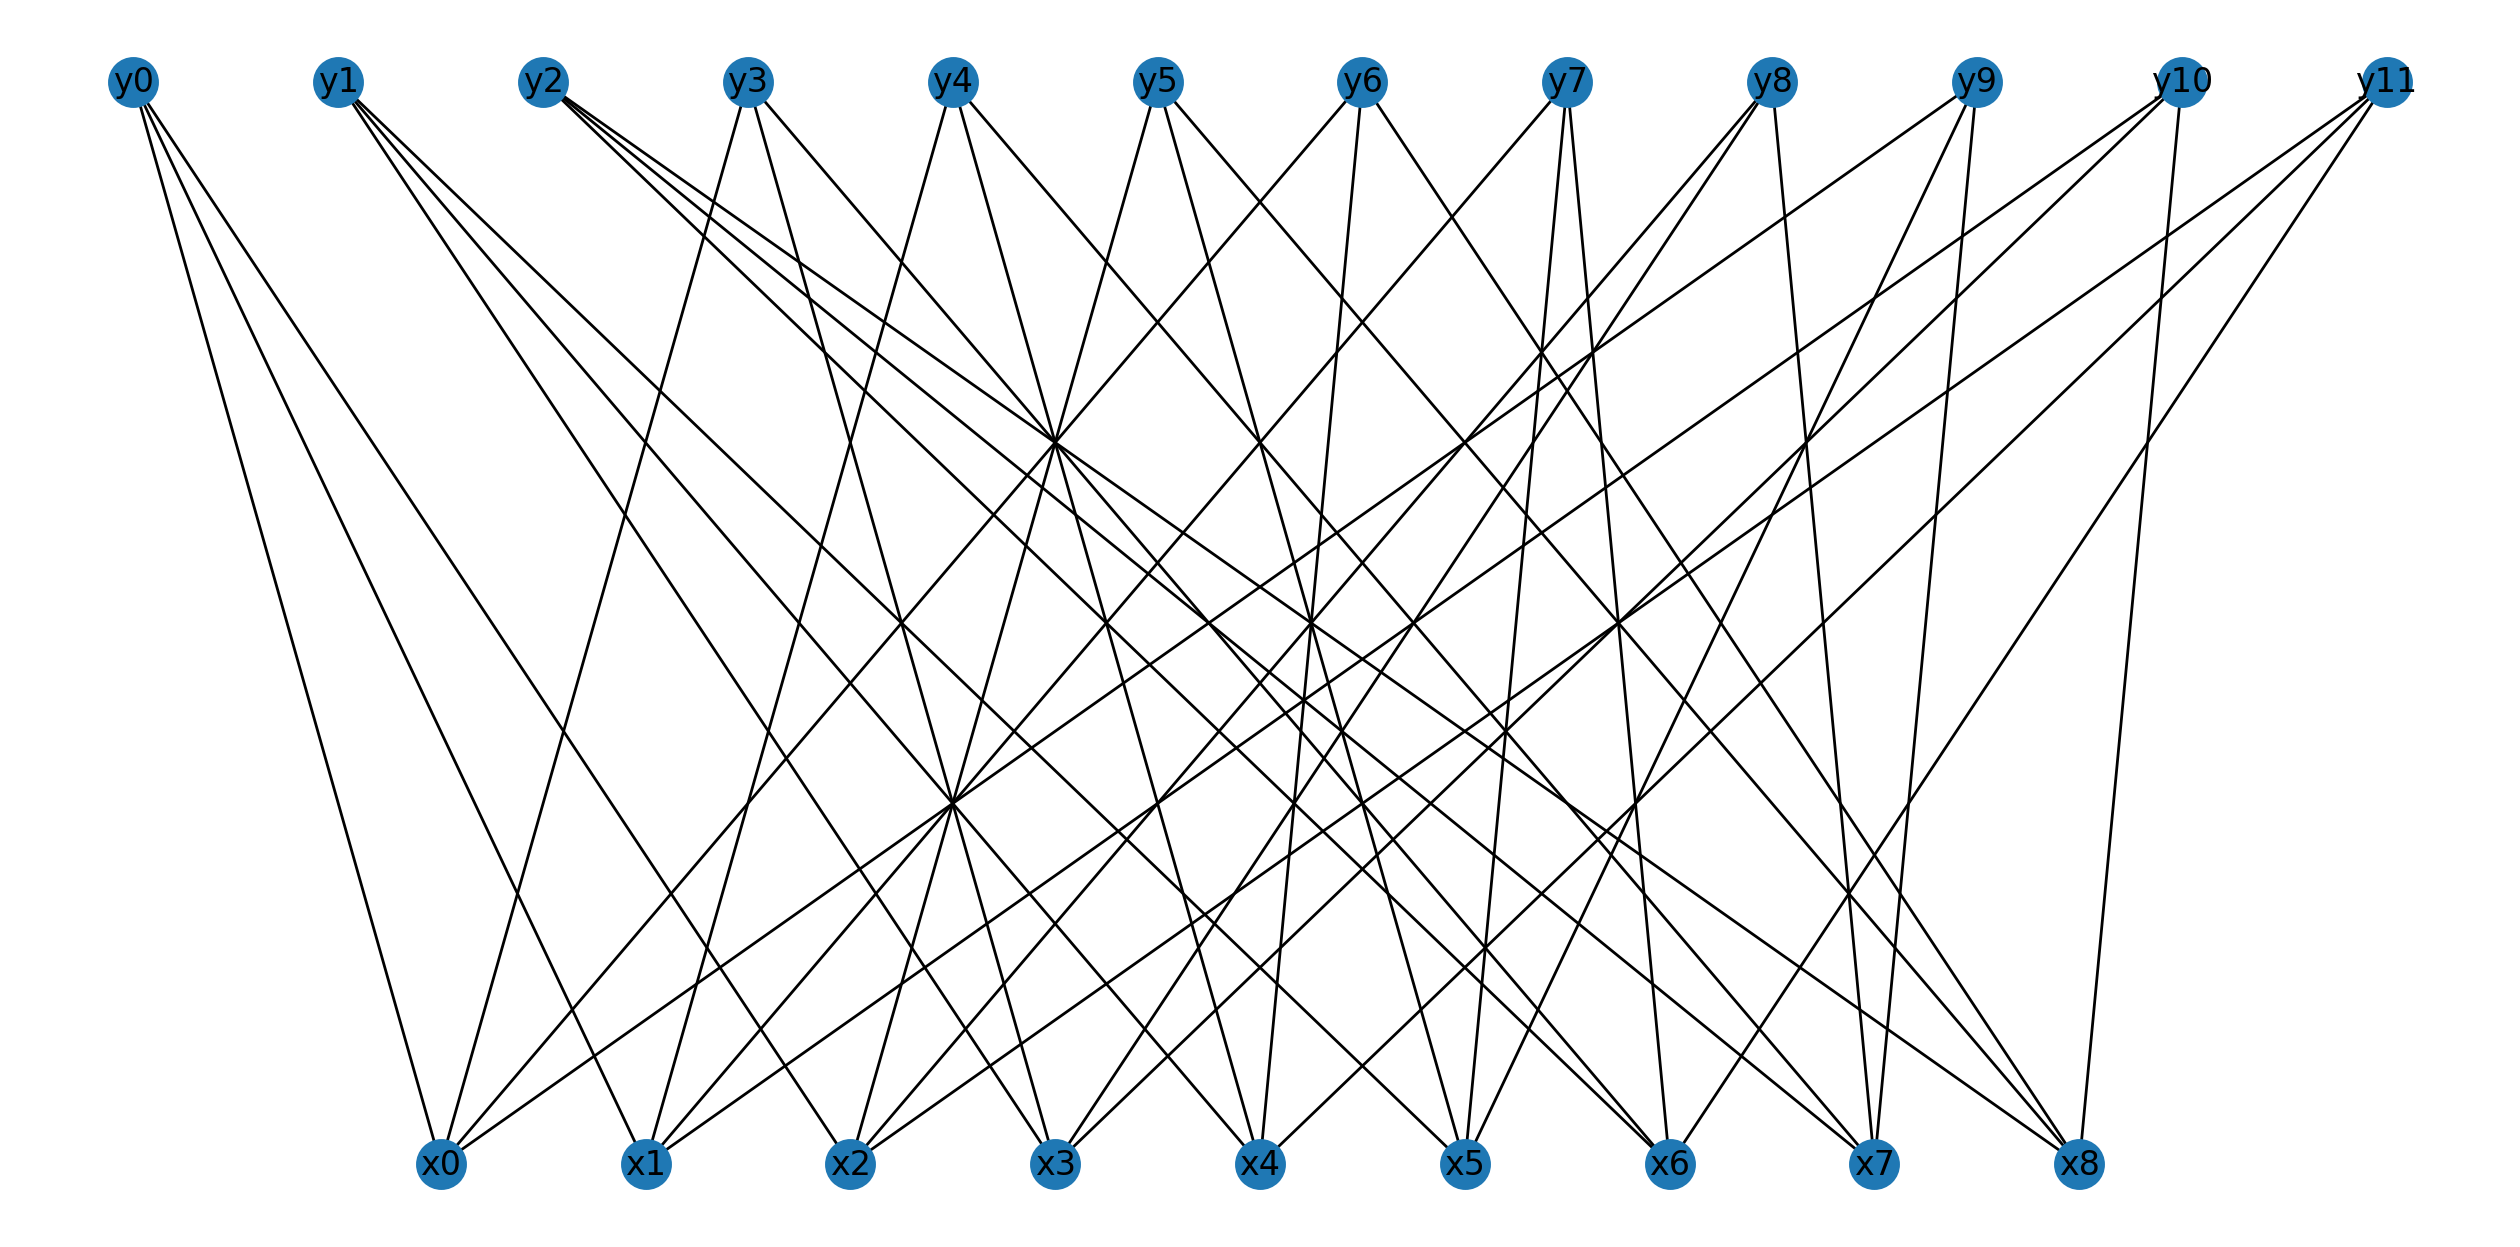

In [30]:
plot_bibd(3)

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


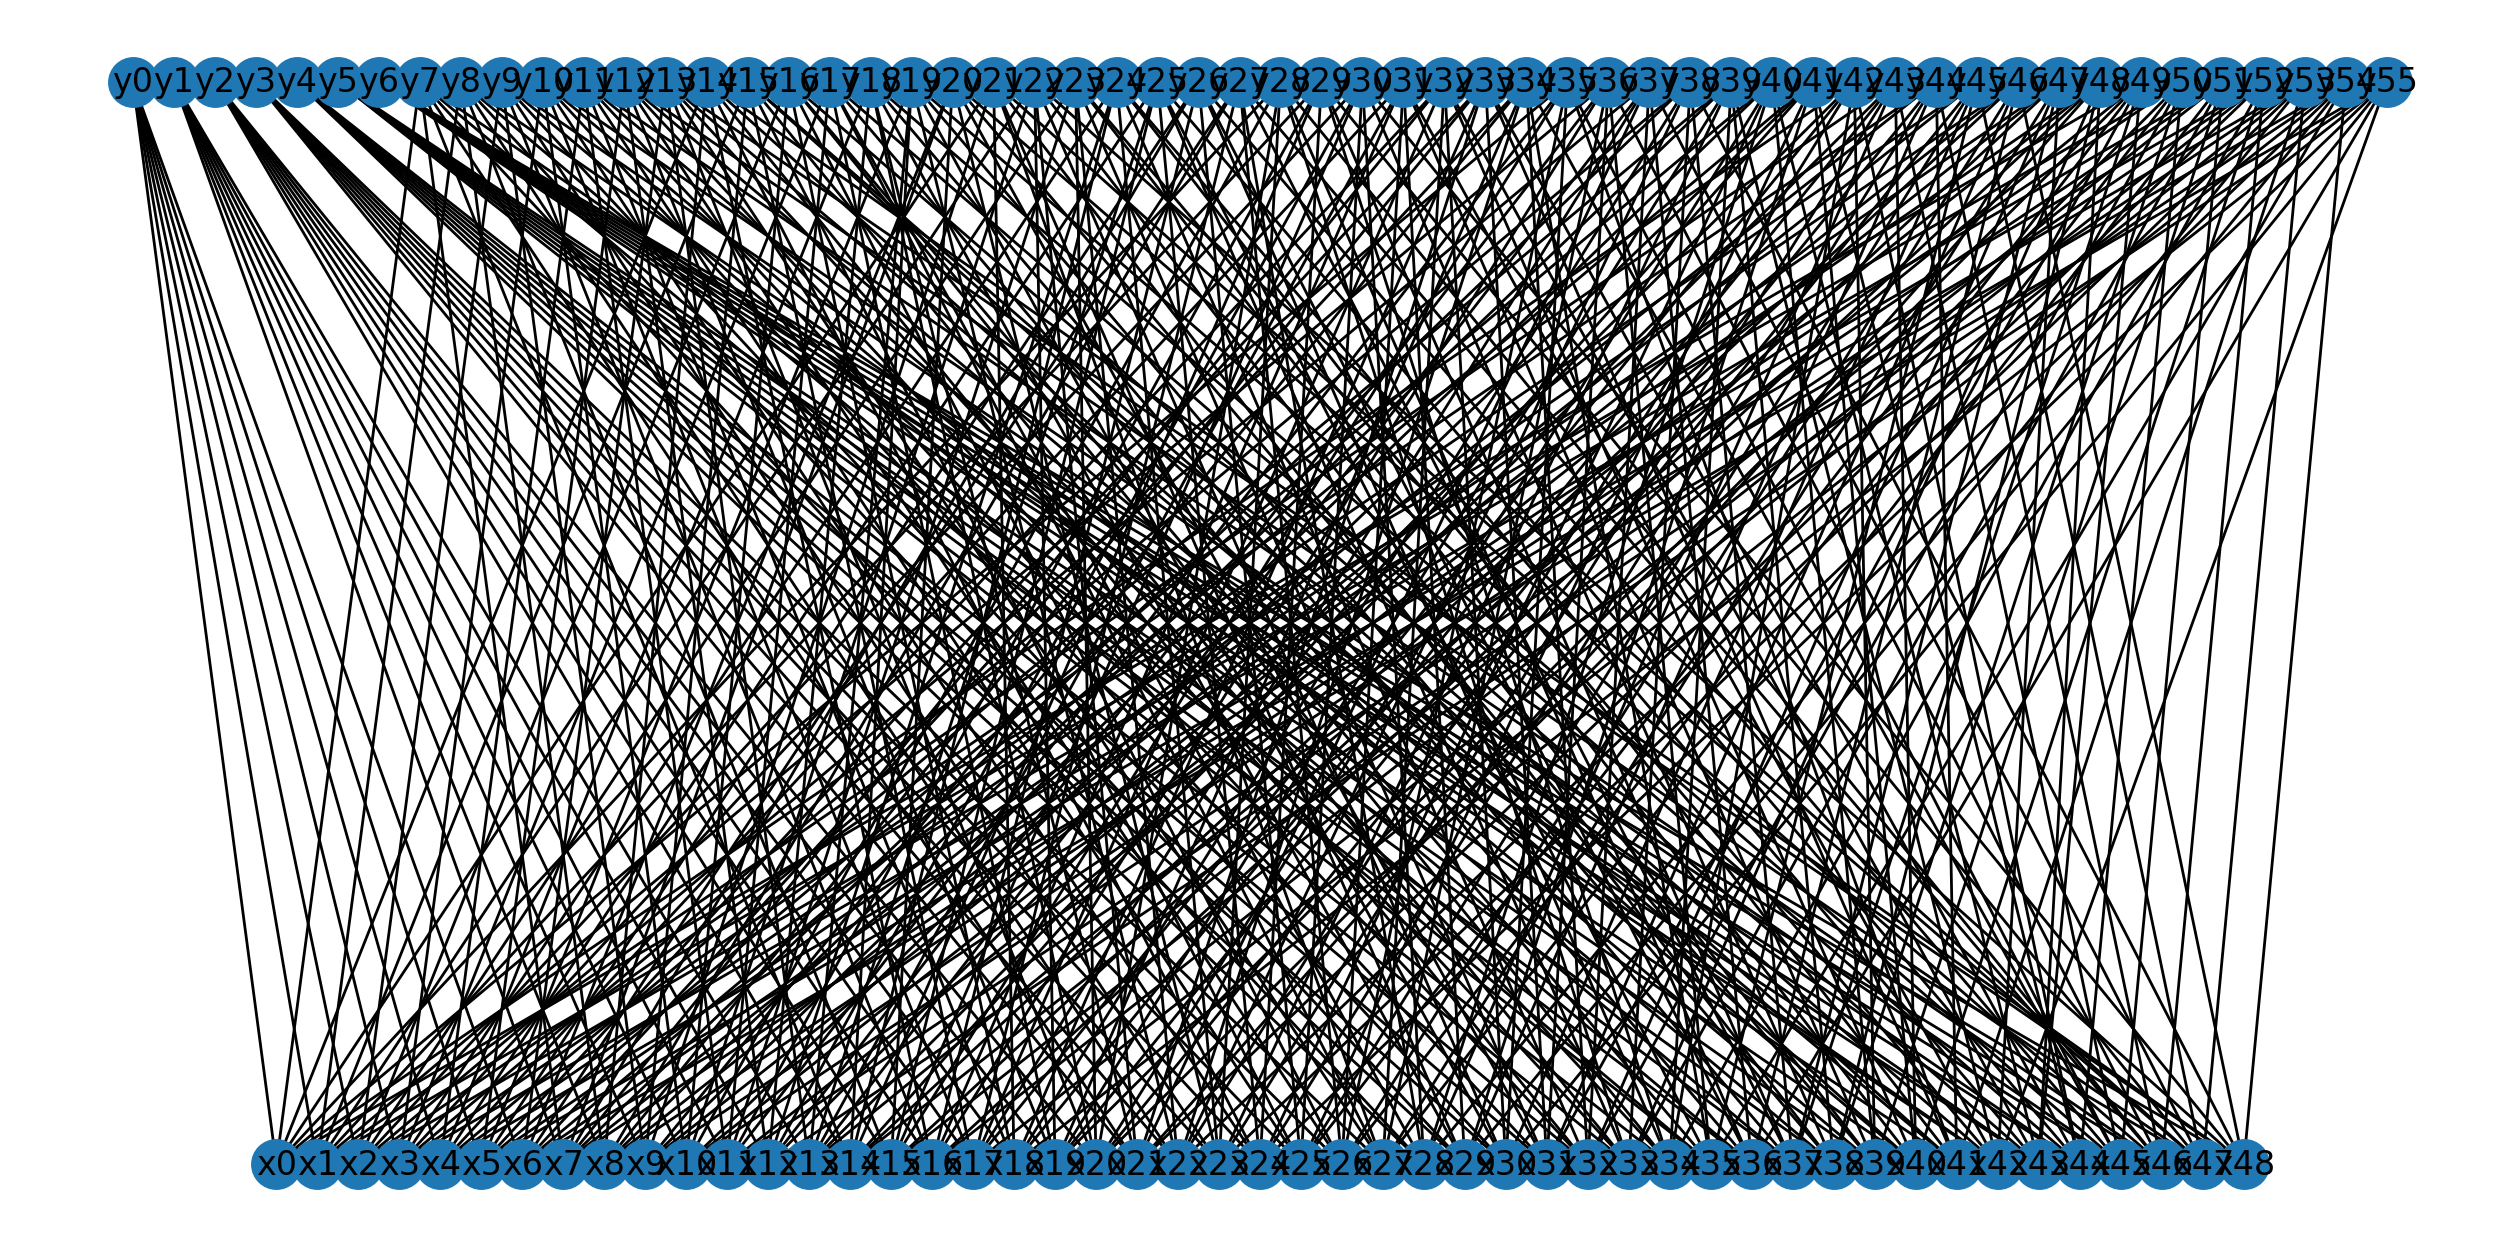

In [31]:
plot_bibd(7)